In [1]:
import pandas as pd

big_df= pd.read_csv('DataforXA.csv')
big_df

,Unnamed: 0,AADT,AADT_Single_Unit_mean_x,AADT Combination,Future_AADT_mean_x,Initial IRI,Thickness_Rigid_mean_x,Thickness_Flexible_mean_x,Base Thickness,Functional System,...,Last_Overlay_Thickness_mean_x,Annual Daily Average Relative Humidity,Annual Average Freezing Index,Annual Average Daily Temperature,PRECIPITATION_x,Age_x,Urban_Type_rural,Urban_Type_small urban,Urban_Type_urban,IRI_mean_y
0,0,5500.036562,174.930063,66.971873,8706.027253,168.235520,0.000000,13.107797,10.079378,5,...,2.896257,76.887794,0.101136,22.360069,1087.264941,19.093855,1,0,0,187.7
1,1,9672.000000,397.000000,222.000000,10831.000000,40.000000,0.000000,6.000000,22.000000,4,...,1.000000,80.900000,756.200000,6.800000,1362.000000,12.000000,1,0,0,52.4
2,2,5900.000000,259.000000,81.000000,9800.000000,199.500000,0.000000,4.000000,3.000000,4,...,2.000000,77.600000,254.600000,10.400000,1398.800000,48.000000,0,0,1,229.0
3,3,16063.967335,839.976312,210.133418,17348.899614,128.114880,7.914316,1.969743,7.976942,3,...,2.144701,77.328263,138.216742,12.414491,1389.175384,92.026923,0,0,1,134.5
4,4,29389.000000,3291.000000,3397.000000,33474.000000,63.000000,0.000000,4.500000,32.000000,1,...,16.500000,76.200000,315.700000,10.500000,1319.700000,16.000000,1,0,0,86.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9423,9423,7905.000000,427.000000,87.000000,11518.000000,39.200000,0.000000,2.500000,48.000000,1,...,2.500000,83.600000,978.500000,5.100000,1469.200000,34.000000,1,0,0,39.8
9424,9424,93000.000000,2971.000000,2051.000000,93930.000000,73.900000,0.000000,3.000000,8.000000,2,...,0.000000,73.100000,0.000000,25.300000,1154.800000,24.000000,0,0,1,74.8
9425,9425,52100.000000,2672.000000,2002.000000,55000.000000,56.000000,8.000000,5.000000,11.000000,2,...,2.500000,77.600000,254.600000,10.400000,1398.800000,56.000000,0,0,1,73.0
9426,9426,10557.000000,501.000000,226.000000,20000.000000,301.700000,5.000000,5.000000,4.000000,3,...,3.000000,76.000000,658.400000,8.600000,1061.600000,75.000000,0,0,1,331.0


In [2]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Separate features and target
X_resampled = big_df.drop(columns=['IRI_mean_y'])
y_resampled = big_df['IRI_mean_y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Set up hyperparameter grid for tuning the XGBoost regressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 6, 10],  # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.05, 0.1],  # Boosting learning rate (xgb's "eta")
    'subsample': [0.7, 0.9, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'min_child_weight': [1, 5, 10]  # Minimum sum of instance weight (hessian) needed in a child
}

# Configure GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)  # X_train and y_train should be pre-defined with your training data

# Get the best XGBoost model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test data
y_pred_xgb = best_xgb.predict(X_test)  # X_test should be your test dataset

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.7; t

/Users/aerfani/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0

In [3]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)
mape = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

# Print metrics
print(f"Decision Tree Regressor Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")

Decision Tree Regressor Metrics:
Mean Squared Error: 152.64036446726115
Mean Absolute Error: 7.986719900477096
Root Mean Squared Error: 12.354770919254682
R-squared: 0.9662294774234631
Mean Absolute Percentage Error: 7.12869255553899%


In [4]:
import shap

# Initialize the SHAP explainer with your RandomForest model
explainer = shap.TreeExplainer(best_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Print basic summary of SHAP values to check
print(shap_values)

[[ 0.7950099  -0.05091653  0.6001082  ... -1.042637   -0.08262911
  -0.07457402]
 [ 0.10874552 -0.44897684 -0.48849526 ...  0.16204125 -0.05601523
   0.13878998]
 [-0.57259417  0.8111885  -1.6940447  ...  0.10730589 -0.10030603
   0.01482285]
 ...
 [ 0.02809297 -0.01218411 -0.5450021  ... -0.07066929 -0.02239608
   0.02447688]
 [ 1.6854489   1.5088537   0.8151066  ...  0.08573233 -0.04690837
   0.03740155]
 [ 0.49884328  0.24347013 -0.1382553  ...  0.08593577 -0.08934839
   0.16891752]]


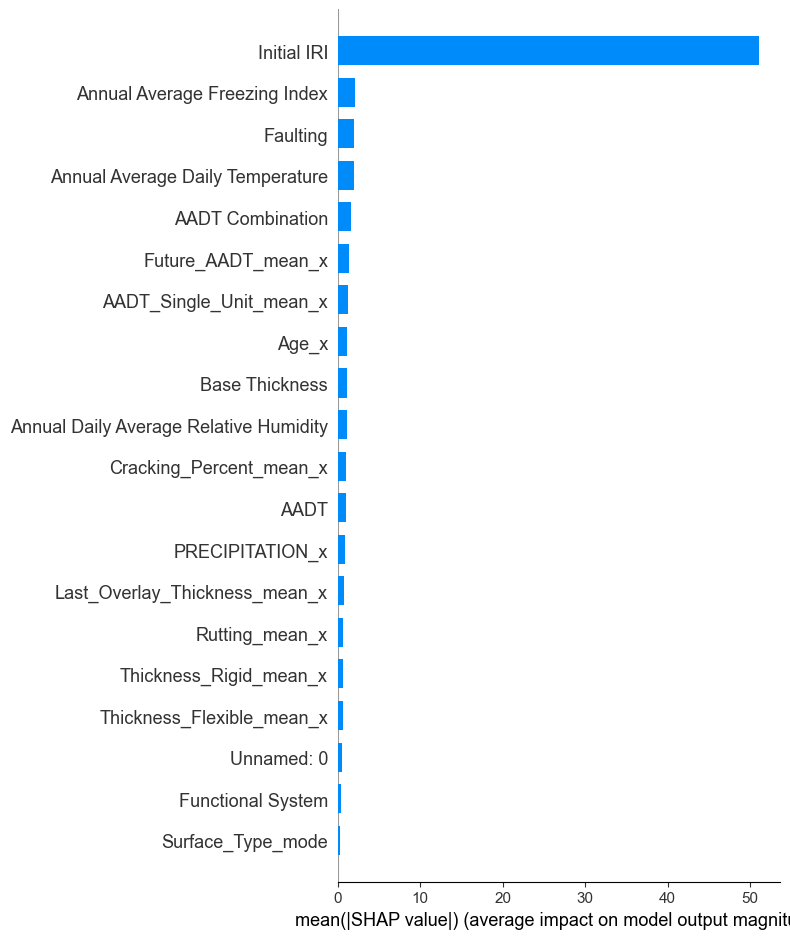

In [5]:
# Summary plot for overall feature importance
# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [6]:
plt.figure(figsize=(6, 10))  # Adjust figure size
# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10, show=False)  # Top 10 features
plt.xlabel('Mean |SHAP Value| (Average Impact on Model Output)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Reduce white space
plt.savefig("shap_summary_plot_improved.png", dpi=900, bbox_inches="tight")
plt.close()


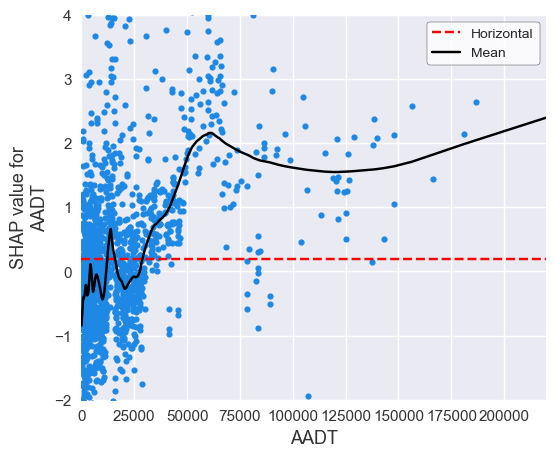

In [7]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style

# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 
def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    plt.ylim(-2, 4)
    plt.xlim(0, 220000)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("1.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'AADT','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.


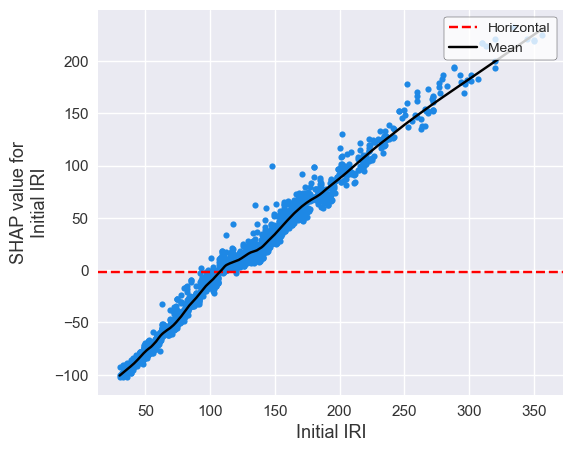

In [8]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style
# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    #plt.ylim(-2, 4)
    #plt.xlim(0, 100)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("2.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'Initial IRI','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.


/Users/aerfani/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


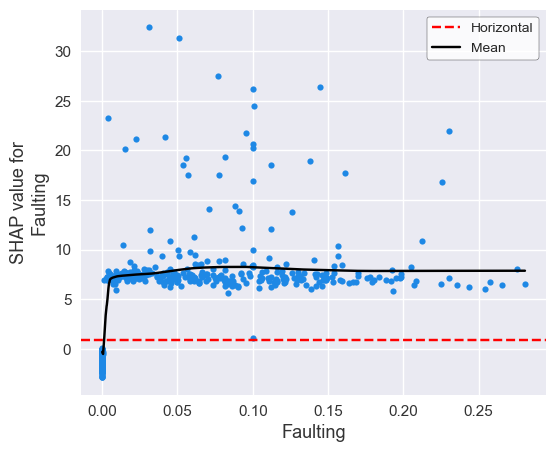

In [9]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style

# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    #plt.ylim(-2, 4)
    #plt.xlim(0, 100)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("3.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'Faulting','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.


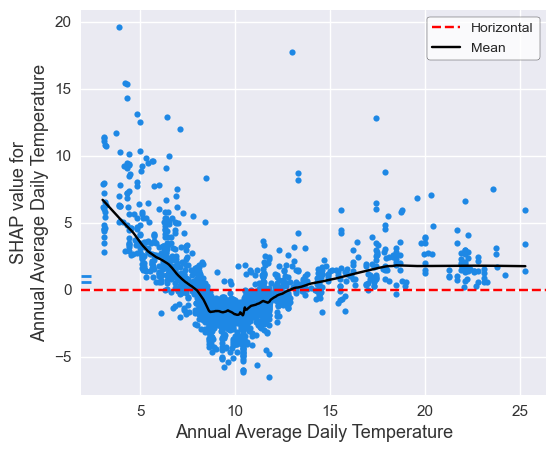

In [10]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style

# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    #plt.ylim(-2, 4)
    #plt.xlim(0, 100)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("4.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'Annual Average Daily Temperature','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.


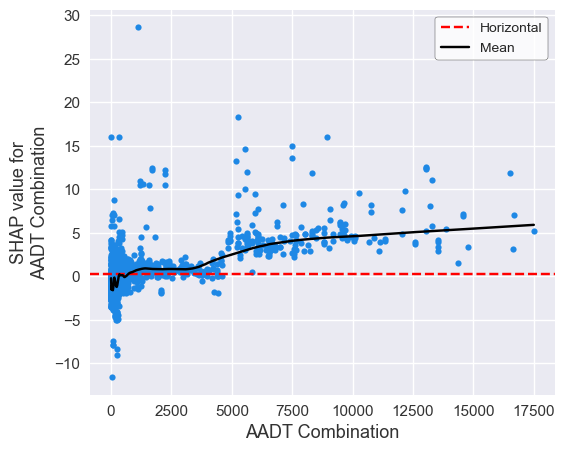

In [11]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style

# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    #plt.ylim(-2, 4)
    #plt.xlim(0, 100)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("5.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'AADT Combination','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.


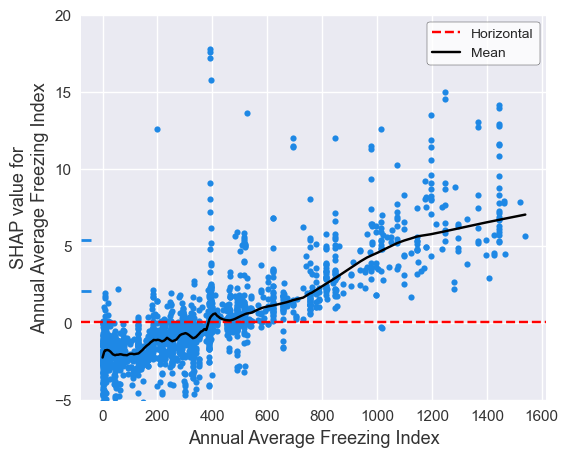

In [12]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style
# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    plt.ylim(-5, 20)
    #plt.xlim(0, 100)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("6.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'Annual Average Freezing Index','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.



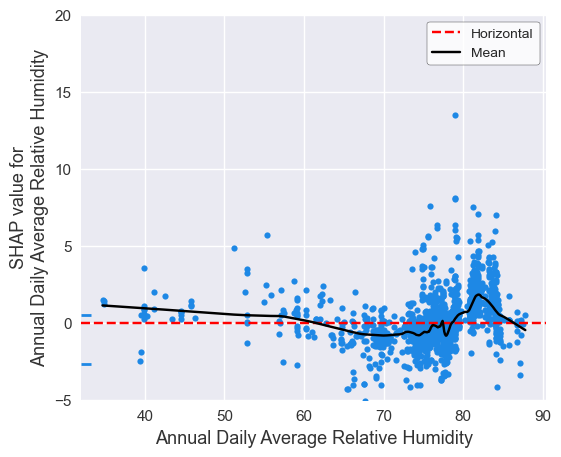

In [13]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style

# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    plt.ylim(-5, 20)
    #plt.xlim(0, 100)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("7.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'Annual Daily Average Relative Humidity','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.



/Users/aerfani/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


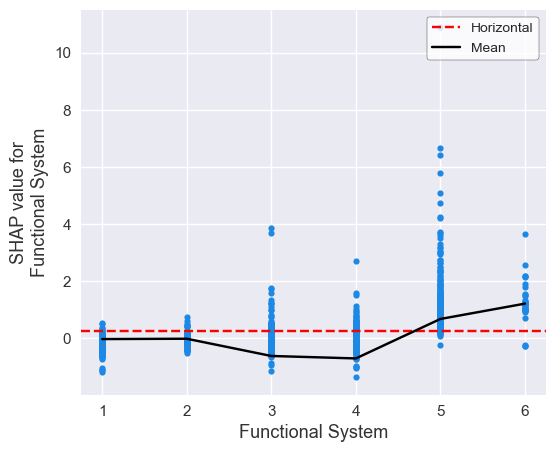

In [14]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style

# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    #plt.ylim(-2, 4)
    #plt.xlim(0, 220000)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("8.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'Functional System','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.


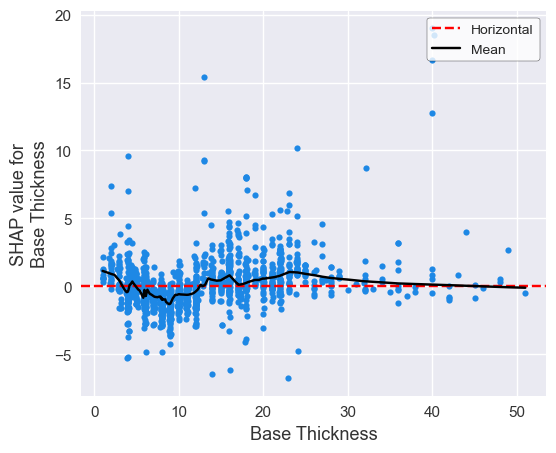

In [17]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.style as style

# Set font style globally before any plotting
plt.rcParams["font.family"] = "Arial" 

def plot_shap_values_with_styles(X, shap_values, feature_name, style_name):
    # Apply the selected style
    style.use(style_name)

    # Plot SHAP values for a single feature
    shap.dependence_plot(feature_name, shap_values, X, interaction_index=None, show=False, dot_size=20)
    
    # Calculate the mean of SHAP values for the horizontal line
    mean_shap = np.mean(shap_values[:, X.columns.get_loc(feature_name)])
    
    # Add a horizontal line at the mean SHAP value
    plt.axhline(y=mean_shap, color='r', linestyle='--', label='Horizontal')

    # Calculate LOWESS for a smooth trend line
    lowess = sm.nonparametric.lowess
    y_values = shap_values[:, X.columns.get_loc(feature_name)]
    x_values = X[feature_name]
    lowess_results = lowess(y_values, x_values, frac=0.1)

    # Plot the LOWESS result
    plt.plot(lowess_results[:, 0], lowess_results[:, 1], 'k-', label='Mean')

    # Adding title and customizing the plot
    #plt.title(f'SHAP value for {feature_name}')
    # Adjust the min and max values as necessary for your data
    #plt.ylim(-2, 4)
    #plt.xlim(0, 220000)  # Adjust the x-axis range as needed
    plt.grid(True)
    plt.legend(loc='upper right', shadow=False,frameon=True,facecolor='white',edgecolor='black')
    plt.savefig("9.png", dpi=900, bbox_inches="tight")
    plt.show()

# Example usage, try different styles to see which one you like
# Replace 'Your_Feature_Name' with your specific feature and try different styles
plot_shap_values_with_styles(X_test, shap_values, 'Base Thickness','seaborn-v0_8')  # or 'fivethirtyeight', 'seaborn', etc.


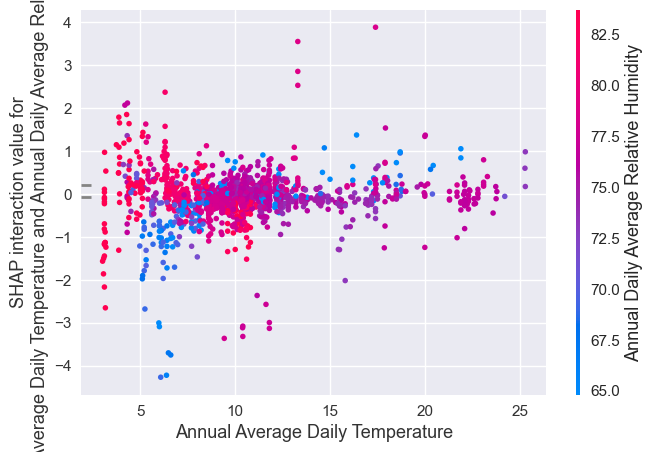

In [19]:
import shap

# Assuming 'model' is your trained XGBoost model and X_test is your test dataset
explainer = shap.TreeExplainer(best_xgb)
shap_interaction_values = explainer.shap_interaction_values(X_test)

# Visualize interaction between Temperature and Humidity
shap.dependence_plot(
    ("Annual Average Daily Temperature", "Annual Daily Average Relative Humidity"),
    shap_interaction_values, 
    X_test,
    interaction_index="Annual Daily Average Relative Humidity"
)


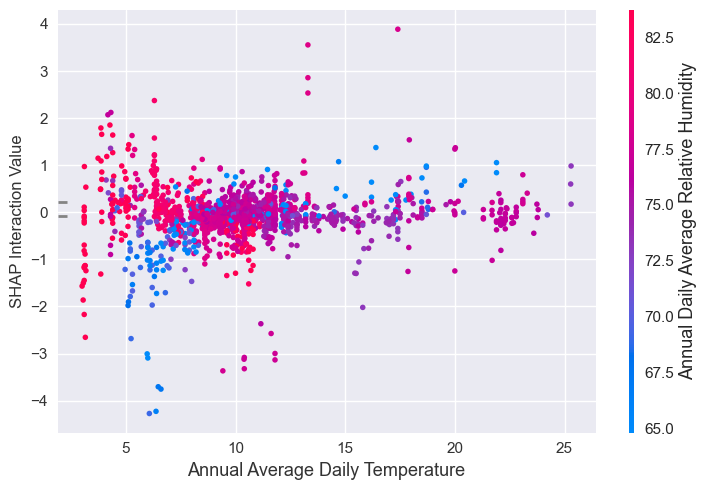

In [21]:
import shap
import matplotlib.pyplot as plt

# Generate SHAP interaction values
explainer = shap.TreeExplainer(best_xgb)
shap_interaction_values = explainer.shap_interaction_values(X_test)

# Create dependence plot and modify the y-axis label
shap.dependence_plot(
    ("Annual Average Daily Temperature", "Annual Daily Average Relative Humidity"),
    shap_interaction_values,
    X_test,
    interaction_index="Annual Daily Average Relative Humidity",
    show=False  # Prevents auto display so we can edit
)

# Update y-axis label
plt.rcParams["font.family"] = "Arial" 
plt.ylabel("SHAP Interaction Value", fontsize=12)
plt.tight_layout()
plt.savefig("10.png", dpi=900, bbox_inches="tight")
plt.show()
